# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

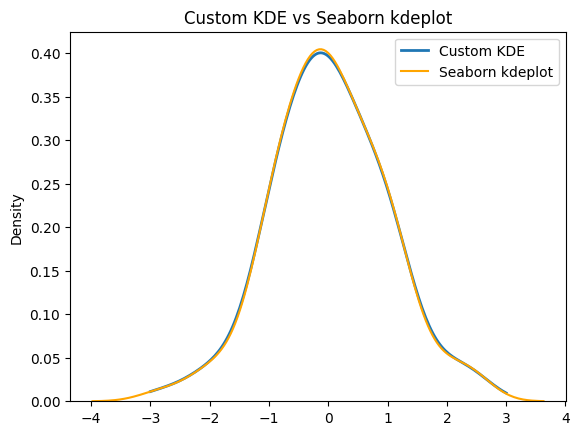

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# Kernel functions options 
def gaussian_kernel(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

def uniform_kernel(z):
    return np.where(np.abs(z) <= 1, 0.5, 0)

def epanechnikov_kernel(z):
    return np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0)

# Silverman's bandwidth selector
def silverman_bw(x):
    n = len(x)
    std_dev = np.std(x)
    return 1.06 * std_dev * n ** (-1/5)

# Main kernel density estimator function
def my_kde(data, grid, kernel="gaussian", bandwidth=None):
    """
    Parameters:
        data: 1D array-like data points.
        grid: points at which to estimate density.
        kernel: kernel type: "gaussian", "uniform", "epanechnikov".
        bandwidth: smoothing parameter. If None, uses Silverman rule.
    """
    data = np.asarray(data, dtype=float)
    # Set bandwidth default
    if bandwidth is None:
        bandwidth = silverman_bw(data)
    
    # Map kernel name to function
    kernels = {
        "gaussian": gaussian_kernel,
        "uniform": uniform_kernel,
        "epanechnikov": epanechnikov_kernel
    }
    kernel_func = kernels.get(kernel)
    if kernel_func is None:
        raise ValueError("Invalid kernel: choose 'gaussian', 'uniform', or 'epanechnikov'")

    densities = []
    for pt in grid:
        z = (pt - data) / bandwidth       # Standardized distance
        kd_vals = kernel_func(z)          # Apply kernel
        density = np.mean(kd_vals) / bandwidth  # Normalize and average
        densities.append(density)
        
    return np.array(densities)

# Example usage and plot
if __name__ == "__main__":
    # Sample data
    data = np.random.normal(0, 1, 100)
    grid = np.linspace(-3, 3, 200)

    # Compute KDE with custom function
    density = my_kde(data, grid, kernel="gaussian")

    # Plot custom KDE
    plt.plot(grid, density, label="Custom KDE", linewidth=2)

    # Plot Seaborn KDE for comparison
    sns.kdeplot(data, bw_adjust=1, label="Seaborn kdeplot", color="orange")

    plt.legend()
    plt.title("Custom KDE vs Seaborn kdeplot")
    plt.show()



**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [20]:
import pandas as pd

df = pd.read_csv('./data/college_completion.csv')
df.head()
print("Shape of Data:", df.shape)
print("Columns:", df.columns.tolist())





Shape of Data: (3798, 63)
Columns: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer'

In [22]:
pd.crosstab(df['control'], df['level'])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


private not-for-profits are mostly 4-year (1,180 vs 68 two-year), publics have more 2-year (926) than 4-year (632), and private for-profits are close to even (465 two-year vs 527 four-year).

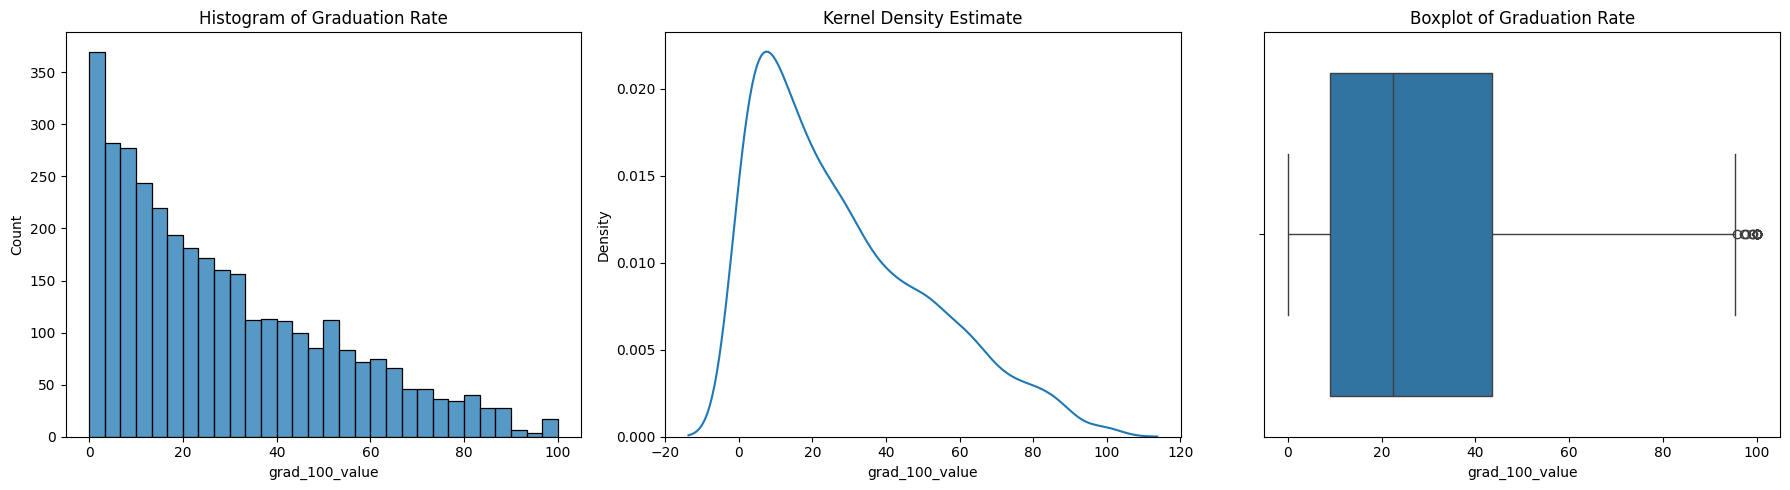

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
10%         2.900000
25%         9.000000
50%        22.500000
75%        43.650000
90%        63.400000
95%        75.000000
max       100.000000
Name: grad_100_value, dtype: float64

In [21]:
#4
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

g = df['grad_100_value'].astype(float).dropna()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(g, bins=30, ax=axs[0])
axs[0].set_title('Histogram of Graduation Rate')
axs[0].set_xlabel('grad_100_value')

sns.kdeplot(g, ax=axs[1])
axs[1].set_title('Kernel Density Estimate')
axs[1].set_xlabel('grad_100_value')

sns.boxplot(x=g, ax=axs[2])
axs[2].set_title('Boxplot of Graduation Rate')
axs[2].set_xlabel('grad_100_value')

plt.tight_layout()
plt.show()

# Statistical summary
display(g.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95]))



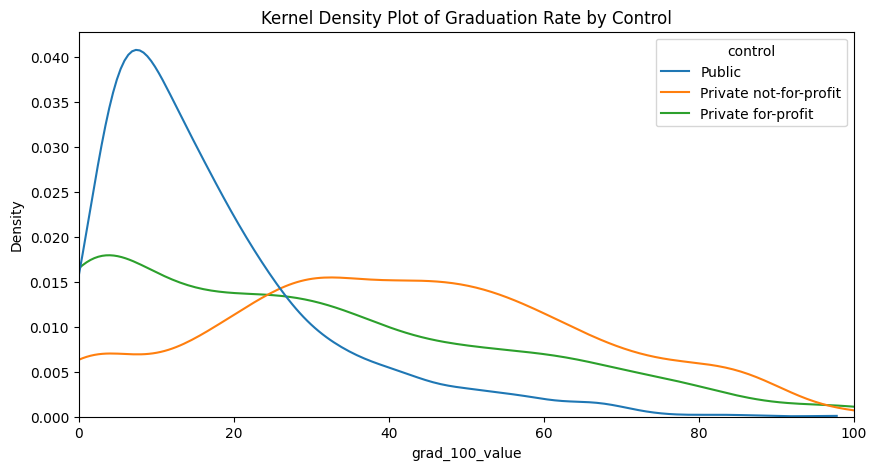

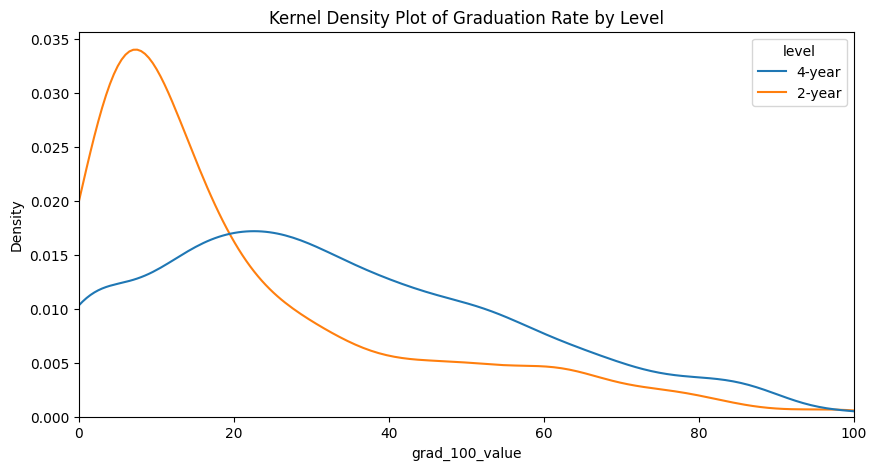

Descriptive Statistics by Control:
                         count   mean    std  min    25%   50%    75%    max
control                                                                     
Private for-profit       779.0  29.11  25.60  0.0   6.95  24.7  46.75  100.0
Private not-for-profit  1189.0  41.66  23.55  0.0  25.00  41.0  58.30  100.0
Public                  1499.0  17.43  14.73  0.0   6.90  13.2  23.25   97.8

Descriptive Statistics by Level:
         count   mean    std  min   25%   50%    75%    max
level                                                      
2-year  1455.0  21.64  21.65  0.0   6.0  13.0  30.60  100.0
4-year  2012.0  33.23  23.27  0.0  15.2  29.7  49.22  100.0

Descriptive Statistics by Level & Control:
                                count   mean    std  min    25%   50%    75%    max
level  control                                                                     
2-year Private for-profit       461.0  37.20  25.50  0.0  15.80  33.9  57.80  100.0
       Pri

In [29]:
#5
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

g = 'grad_100_value'
plot_df = df.dropna(subset=[g, 'control', 'level']).copy()


plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=plot_df, x=g, hue='control',
    common_norm=False, clip=(0, 100), cut=0, bw_adjust=1.0 #make sure no negative values 
)
plt.title('Kernel Density Plot of Graduation Rate by Control')
plt.xlabel(g); plt.ylabel('Density'); plt.xlim(0,100)
plt.show()


plt.figure(figsize=(10,5))
sns.kdeplot(
    data=plot_df, x=g, hue='level',
    common_norm=False, clip=(0, 100), cut=0, bw_adjust=1.0
)
plt.title('Kernel Density Plot of Graduation Rate by Level')
plt.xlabel(g); plt.ylabel('Density'); plt.xlim(0, 100)

plt.show()


control_stats = plot_df.groupby('control')[g].describe().round(2)
level_stats   = plot_df.groupby('level')[g].describe().round(2)
both_stats    = plot_df.groupby(['level','control'])[g].describe().round(2)

print("Descriptive Statistics by Control:")
print(control_stats.to_string())
print("\nDescriptive Statistics by Level:")
print(level_stats.to_string())
print("\nDescriptive Statistics by Level & Control:")
print(both_stats.to_string())



4-year distributions sit to the right of 2-year, and private not-for-profit sits to the right of public and for-profit, with all groups showing a long right tail.

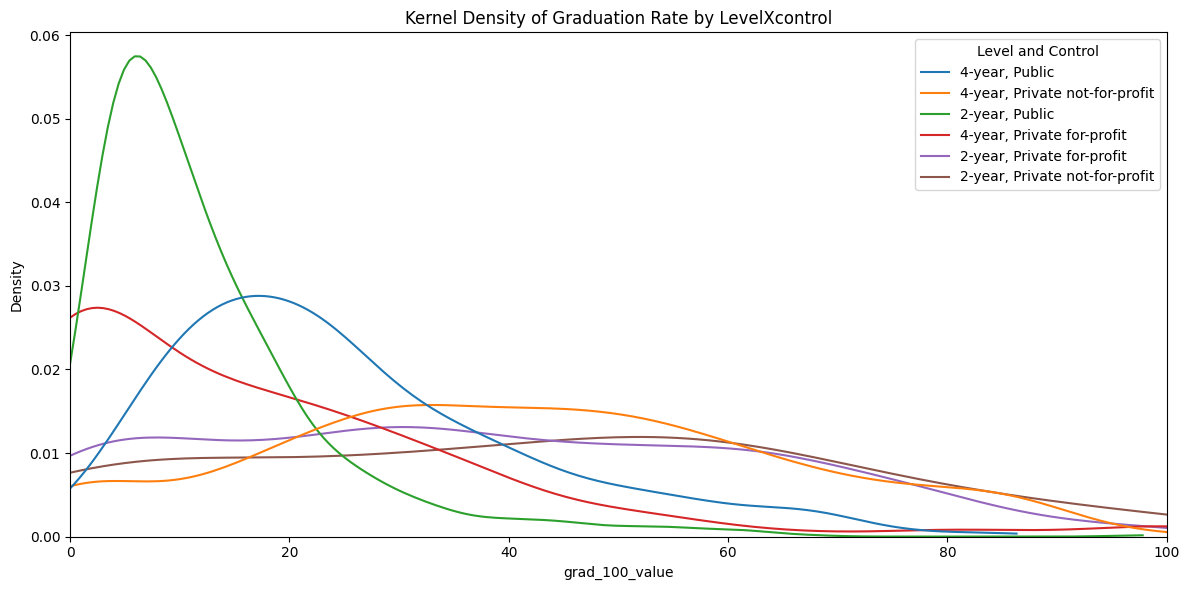

In [39]:
#  6 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

g = 'grad_100_value'


plot_df =df.dropna(subset=[g, 'level', 'control']).copy()
plot_df['levelXcontrol'] = plot_df['level'].astype(str) + ', ' + plot_df['control'].astype(str)

plt.figure(figsize=(12,6))
ax = sns.kdeplot(
    data=plot_df, x=g, hue='levelXcontrol',
    common_norm=False, clip=(0,100), cut=0, bw_adjust=1.0,
    legend=(plot_df['levelXcontrol'].nunique() > 1)
)
ax.set_title('Kernel Density of Graduation Rate by LevelXcontrol')
ax.set_xlabel(g); ax.set_ylabel('Density'); ax.set_xlim(0,100)
leg = ax.get_legend()
if leg is not None:
    leg.set_title('Level and Control')
plt.tight_layout()
plt.show()

Combining level and control, 4-year private not-for-profit institutions have the highest graduation rates, while 2-year public institutions are the lowest

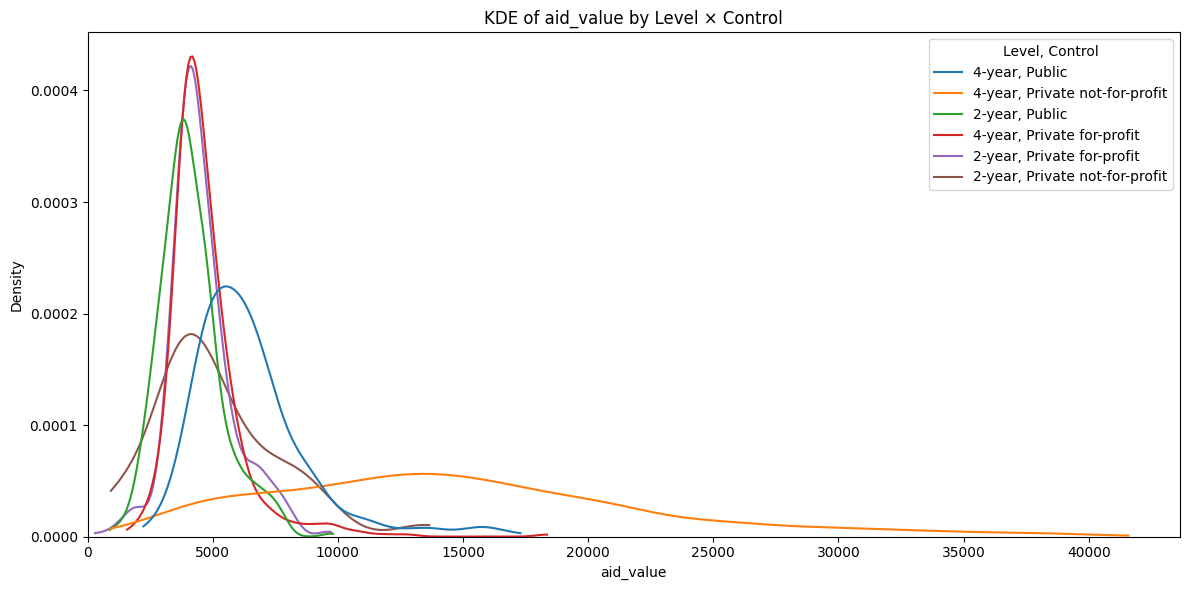

Descriptive statistics of aid_value by level & control:
                                count      mean      std     min      25%      50%       75%      max
level  control                                                                                       
2-year Private for-profit       464.0   4559.68  1286.69   294.0  3818.75   4286.5   5122.00   9727.0
       Private not-for-profit    68.0   5128.06  2590.45   934.0  3650.00   4516.5   6311.50  13654.0
       Public                   926.0   4126.20  1260.27   881.0  3311.25   3943.5   4762.00   9809.0
4-year Private for-profit       527.0   4696.06  1489.41  1580.0  3885.50   4364.0   5131.50  18355.0
       Private not-for-profit  1180.0  14702.40  7649.78   902.0  9113.25  13774.5  18996.75  41580.0
       Public                   632.0   6514.07  2353.72  2232.0  4990.50   6085.0   7341.50  17299.0


In [45]:
#7 USE CANVAS HINTS!! combine them
import seaborn as sns
import matplotlib.pyplot as plt

g = 'aid_value'

# Build interaction label and clean rows
plot_df = df.dropna(subset=[g, 'level', 'control']).copy()
plot_df['levelXcontrol'] = plot_df['level'].astype(str) + ', ' + plot_df['control'].astype(str)

# Single KDE with all combos
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(
    data=plot_df, x=g, hue='levelXcontrol',
    common_norm=False, clip=(0, plot_df[g].max()), cut=0, bw_adjust=1.0,
    legend=(plot_df['levelXcontrol'].nunique() > 1)
)
ax.set_title('KDE of aid_value by Level × Control')
ax.set_xlabel('aid_value'); ax.set_ylabel('Density'); ax.set_xlim(left=0)
leg = ax.get_legend()
if leg is not None:
    leg.set_title('Level,Control')
plt.tight_layout()
plt.show()

# Grouped calculations -describee
stats = (plot_df.groupby(['level','control'])[g].describe().round(2))
print('Descriptive statistics of aid_value by level & control:')
print(stats.to_string())


Aid is right-skewed: 4-year private not-for-profit schools give much higher aid, while the other groups cluster lower (around $4–6k), so their mix creates a tall left peak and a long right tail.

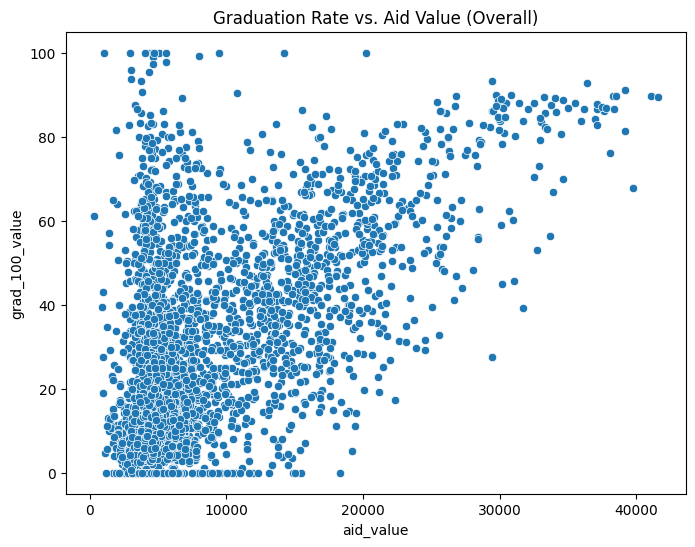

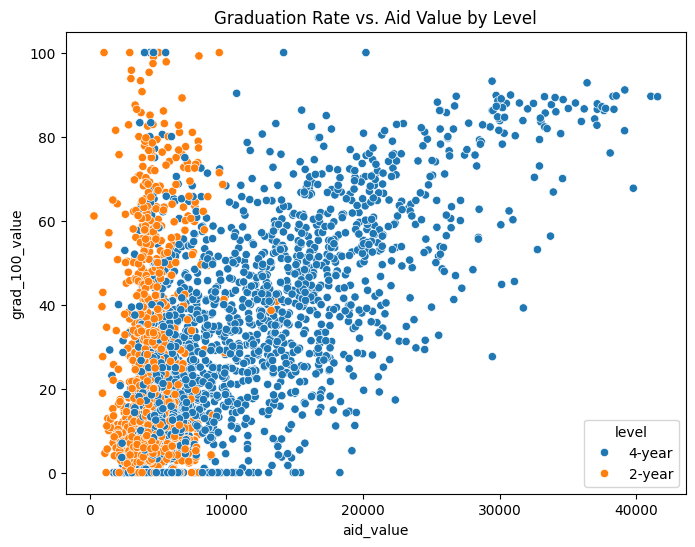

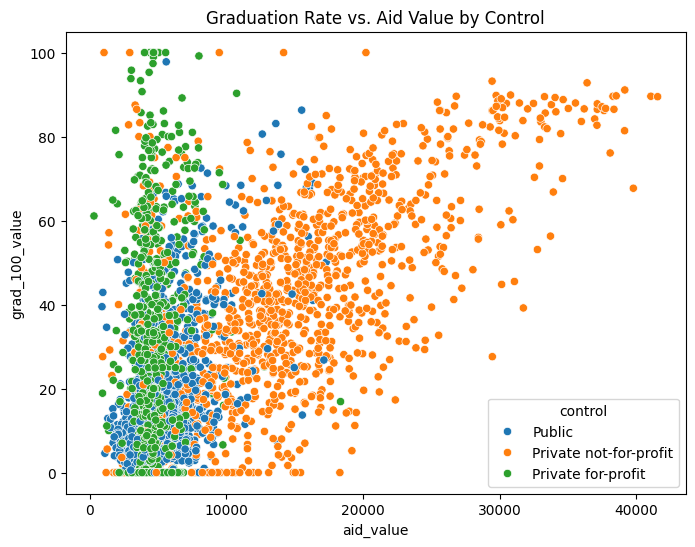

In [46]:

#8
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of graduation rate vs aid value (overall)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Graduation Rate vs. Aid Value (Overall)')
plt.show()

# Scatterplot grouped by level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Graduation Rate vs. Aid Value by Level')
plt.show()

# Scatterplot grouped by control
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Graduation Rate vs. Aid Value by Control')
plt.show()
